In [28]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/nit-kat/Datasets/main/Customer%20Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


***Lets explore the data to check for missing values and duplicates***

In [32]:
df.duplicated().sum() #checking for duplicates

0

***There are no duplicates in the data***

In [39]:
df.isnull().sum() #checking for null values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


***The above shows no null values, however in excel Blanks are found in Total Charges column.***

***This could be due to column being Object datatype and if value is empty string or a space it is not considered null.***  

In [51]:
blanks = df[df['TotalCharges']==" "]

blanks.head(blanks.shape[0])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


***We can see that the above rows have space as value for Total Charges. We can also see that tenure for these rows is 0, ideally the total charges should have value 0. Lets fix this.***

In [52]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [54]:
#df.isnull().sum() # tells us null values for individual columns
df.isnull().sum().sum() # tells us null values overall in the data

0

In [56]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [57]:
df.duplicated().sum()

0

In [60]:
df['customerID'].duplicated().sum() # make sure to check for duplicated entries for unique identifier as well

0

In [62]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


***We see that most of our columns have Yes/No values. Senior Citizen column has that as 0/1. To maintain consistency with rest of the data lets fix that.***

In [63]:
def fix_senior_citizen(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(fix_senior_citizen)

In [64]:
# always verify

df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


***Lets create some visualizations***

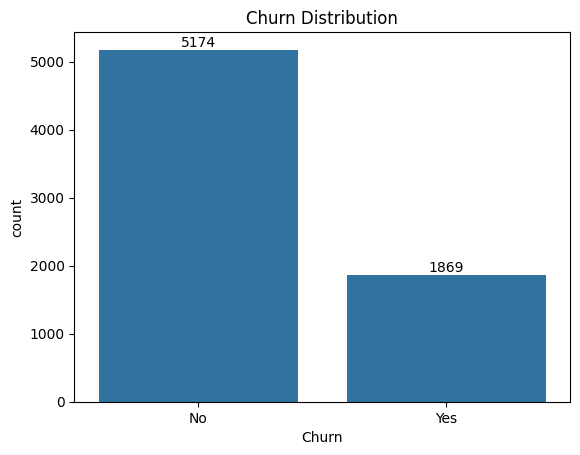

In [80]:
ax = sns.countplot(x=df['Churn'])
ax.bar_label(ax.containers[0])

plt.title('Churn Distribution')
plt.show()

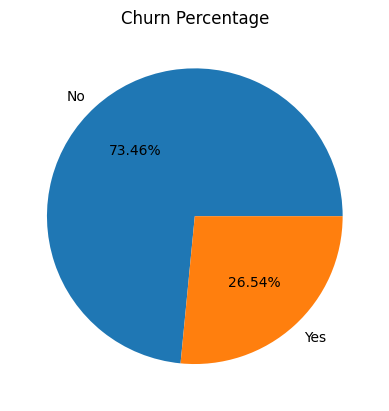

In [82]:
churndf = df.groupby('Churn')['Churn'].count()

plt.pie(churndf, labels=churndf.index, autopct='%0.2f%%')
plt.title('Churn Percentage')
plt.show()

***Now that we know the numbers for Churn. Lets explore and try to find out reasons if any.***

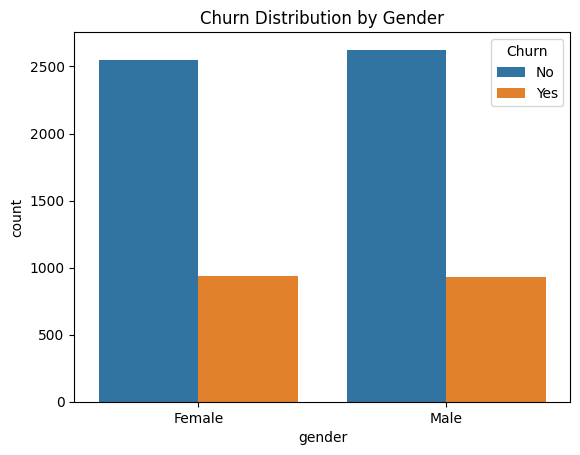

In [84]:
sns.countplot(x=df['gender'],hue=df['Churn'])

plt.title('Churn Distribution by Gender')
plt.show()

**We can see that churn does not seem to be gender dependent.**

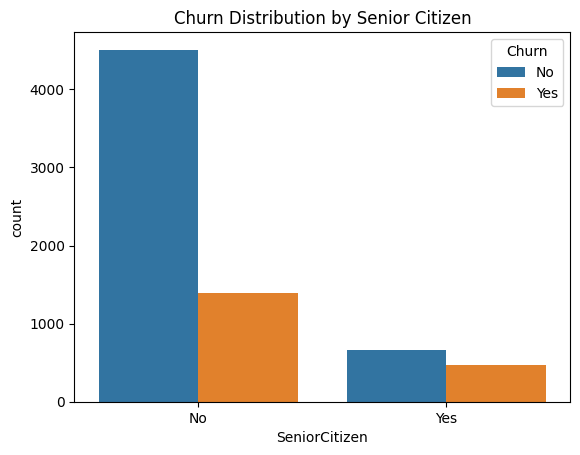

In [91]:
sns.countplot(x=df['SeniorCitizen'],hue=df['Churn'])

plt.title('Churn Distribution by Senior Citizen')
plt.show()

In [105]:
grouped_data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
total_counts = grouped_data.groupby('SeniorCitizen')['Count'].transform('sum')
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

grouped_data

,SeniorCitizen,Churn,Count,Percentage
0,No,No,4508,76.393832
1,No,Yes,1393,23.606168
2,Yes,No,666,58.318739
3,Yes,Yes,476,41.681261


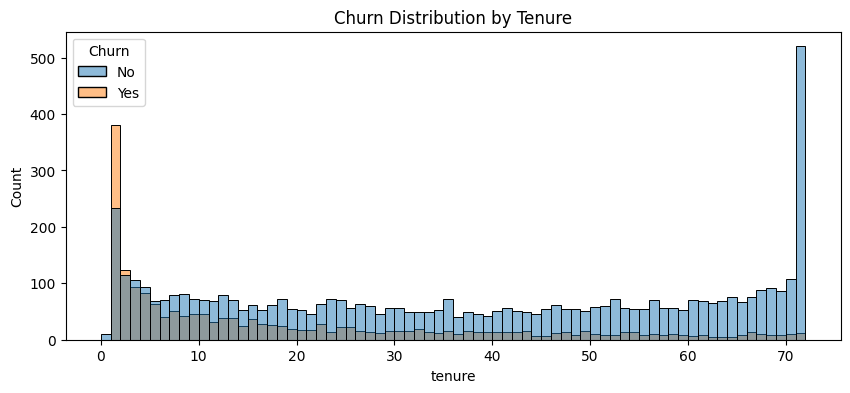

In [135]:
plt.figure(figsize=(10,4))
sns.histplot(x=df['tenure'],bins = 72,hue=df['Churn'])

plt.title('Churn Distribution by Tenure')
plt.show()

***We see many of our customers are either new joiners or very old customers.***

***Also based on Churn data we can see that people of have stayed for long have  churned lesser. The new joiners are mostly where churned customers are higher.***

***Lets see and compare if there are any significant differences.***

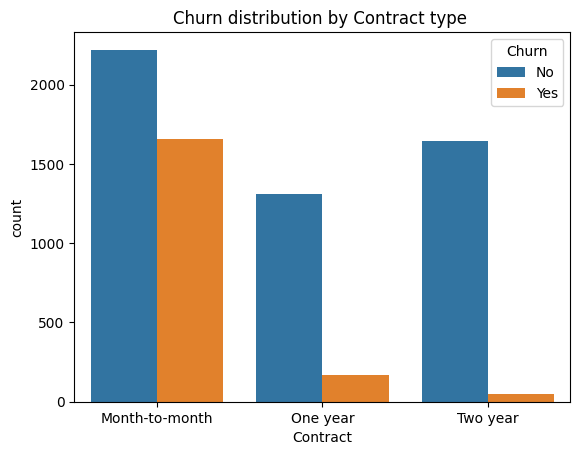

In [120]:
ax = sns.countplot(x=df['Contract'], hue=df['Churn'])

plt.title('Churn distribution by Contract type ')
plt.show()

***We can clearly see in the above chart that the churn rate is very high for Month to Month Contracts. The longer contracts sees less churn rate.***


***Lets see how it is for rest of the fields together.***

In [121]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [132]:
import warnings
warnings.filterwarnings("ignore")

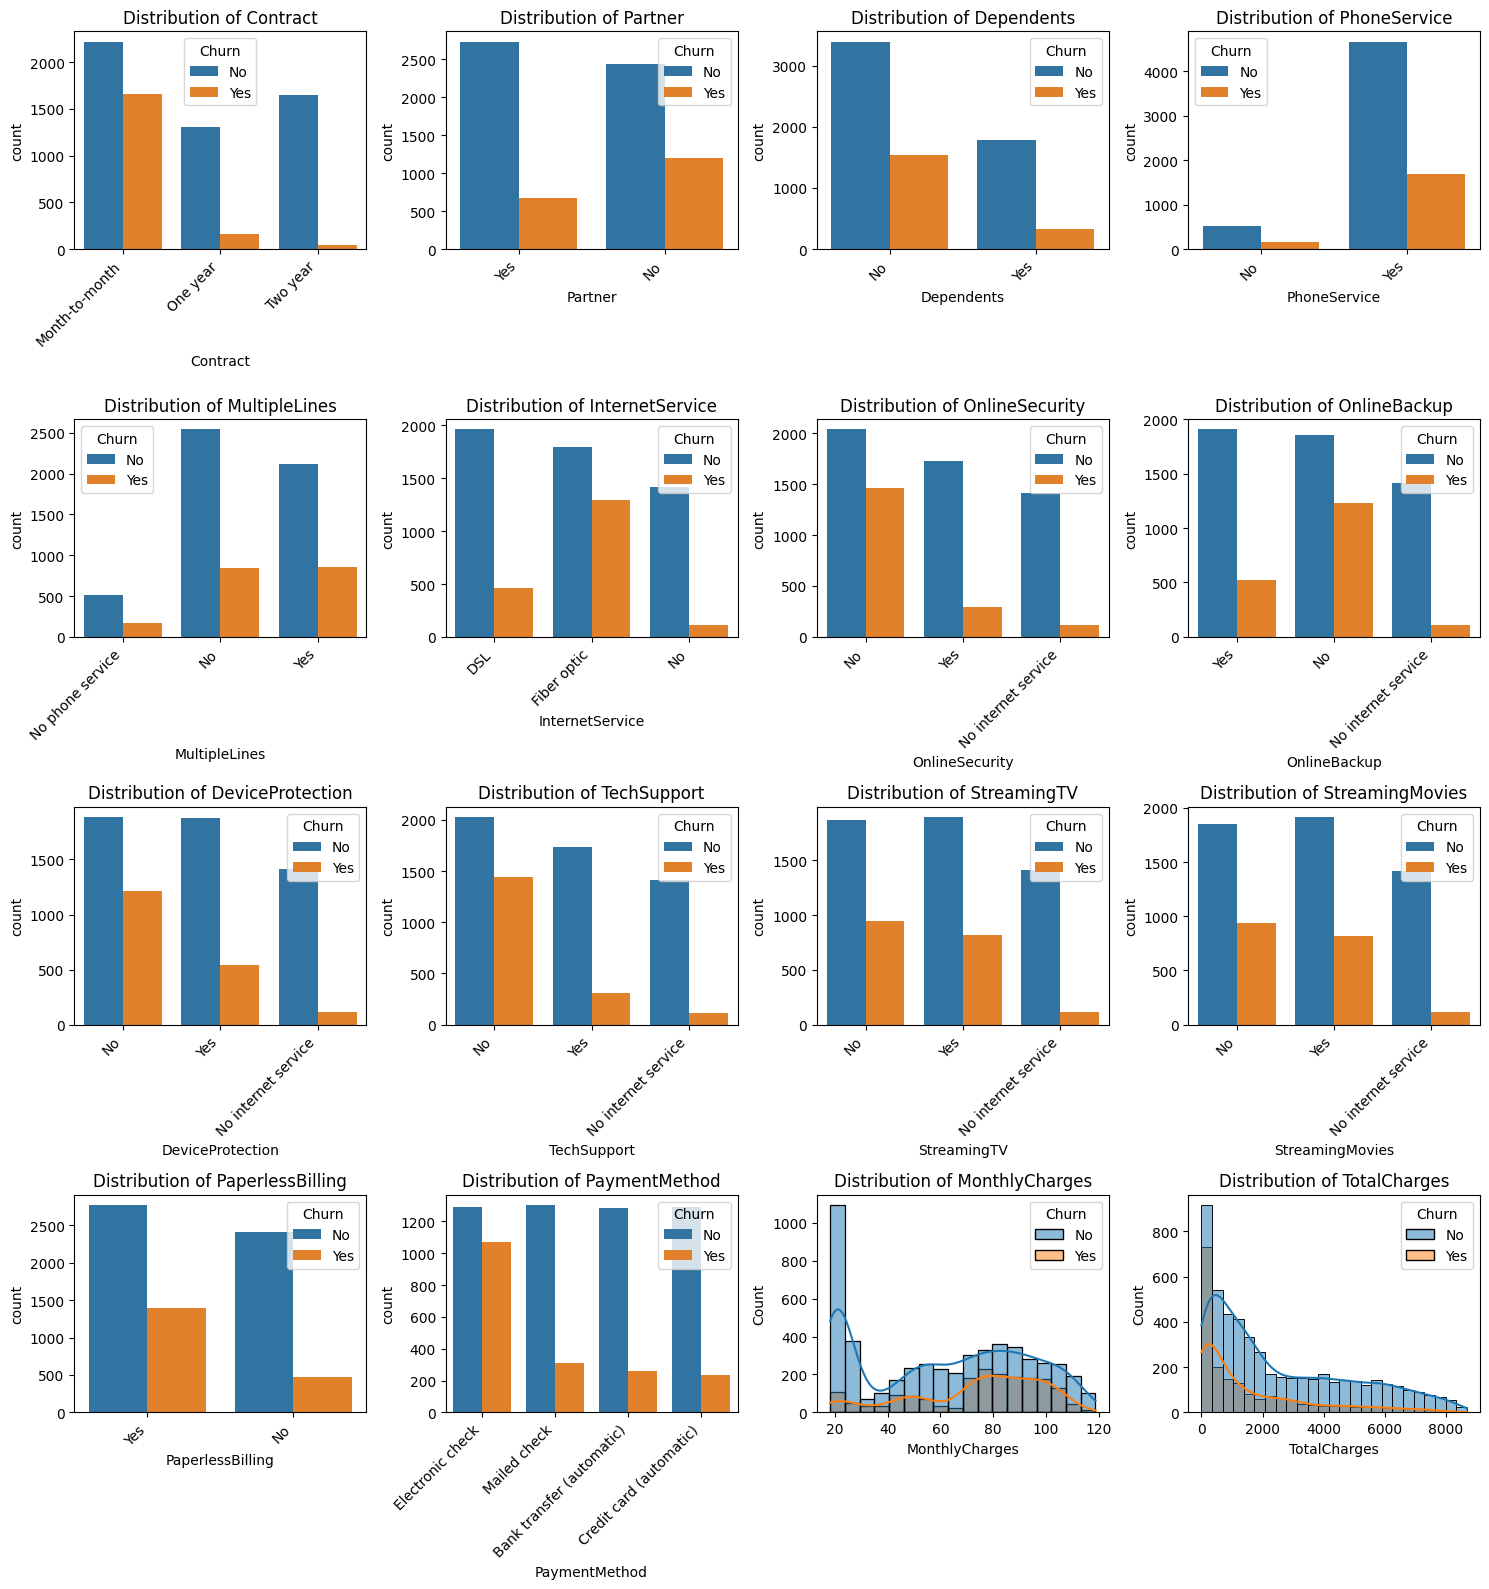

In [134]:
# List of columns to visualize
columns = ['Contract',
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
    'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
]
ncols = 4
nrows = (len(columns) + ncols - 1) // ncols

# Create subplots
fig, axes = plt.subplots( nrows=nrows, ncols=ncols, figsize=(15, nrows*4))
axes = axes.flatten()  # Flatten axes array for easy iteration

hue = df['Churn']
# Plotting each column
for i, col in enumerate(columns):
    if df[col].dtype == 'object':  # Categorical columns
        sns.countplot(data=df, x=col, ax=axes[i], hue = hue)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    else:  # Numerical columns
        sns.histplot(data=df, x=col, ax=axes[i], kde=True, hue = hue)
        axes[i].set_title(f'Distribution of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

***We can conclude that :***

**Most of the customers who have used the services have not churned. The churn rate is higher for customers who have not used the services.**

**The churn rate is very high in Electronic Check payment method.**

**As the monthly charges go higher so does the churn rate.**